**Methods**:

We plan to create scatter plots colour coded for class for each variable pair to visualise our data and figure out which variable pair best predicts whether a star is a pulsar.

1. Load the libraries tidyverse, tidymodels, repr and ggplot2.

2. Read the data from the web using the read_csv() function.

(i) Add column names to the dataframe using the mutate() function

(ii) Change the class to a categorical variable using the as_factor() function.

(iii) Name the output as pulsar_data.

3. Plot scatterplots for each set of variables namely

(i) Mean of the Integrated profile vs Mean of DM-SNR curve

(ii)Standard deviation of the Integrated profile vs the Standard deviation of the DM-SNR curve

(iii)Excess kurtosis of the Integrated profile and the Excess kurtosis of the DM-SNR curve

(iv) Skewness of the Integrated profile vs the Skewness of the DM-SNR curve,
using the ggplot function as shown below. Name the outputs as means_plot, std_dev_plot, excess_kurtosis_plot and skewness_plot respectively.


4. Split the data into two sets in a ratio of 3:1 using the initial_split() function. Name the output as pulsar_split.

5. Create a training and testing data sets by passing the object pulsar_split into the training and testing functions. Name the outputs as pulsar_training_data and pulsar_testing_data respectively.

5. Carry out a 5-fold cross-validation on the training data using the vfold_cv() function and name the output as pulsar_vfold

6. Create a knn classification model specification with a straight line as weight function and tuning on the number of neighbours. Name the output as knn_spec.

7. Create a recipe for the model using the means of the integrated profile and DM-SNR curve. Name the output as pulsar_mean_recipe.

8. Create a workflow analysis with the recipe and model specification using the tune_grid() function. Specify that the tuning should try 10 values of k and collect the metrics from the workflow analysis using the collect_metrics() function. Name the output as knn_mean_results.

9. Filter for accuracy from the knn_mean_results and name the output as mean_accuracies.

10. Plot the neighbours k vs the accuracy using the ggplot function. Assign this plot to an object called mean_accuracy_versus_k_plot.

11. Repeat steps 7 to 10 for each set of variables and name the outputs respectively.

12. Analyse the accuracy vs k plots for each set of variable and choose the set with the highest accuracy.

13. Build the model from the set chosen in step 12.

14. Create a specification for our final knn classification model with a straight line as weight function and using the k-value with the highest accuracy from the set chosen in step 12 as neighbor. Name the output as pulsar_model_spec. 

15. Pass the model specification in step 14 and the training data set to the fit() function. Assign the answer to an object called pulsar_model_fit.

16. Use the final model to predict on the test dataset and assign this to an object called pulsar_predictions.

17. Report the accuracy of this prediction using the metrics() function, and store this in an object named pulsar_metrics.

18. Report the confusion matrix using the conf_mat() function and and store this in an object named mnist_conf_mat.

1. Reading the data from the web.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
set.seed(19)

pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename("mean_ip" = X1, 
                       "std_dev_ip" = X2, 
                       "excess_kurtosis_ip" = X3, 
                       "skewness_ip" = X4, 
                       "mean_dm" = X5,
                       "std_dev_dm" = X6,
                       "excess_kurtosis_dm" = X7,
                       "skewness_dm" = X8,
                       "class" = X9) %>%
                mutate(class = as_factor(class)) %>%
                group_by(class) %>%
                sample_n(size = 250)

pulsar_data   

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dm,std_dev_dm,excess_kurtosis_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
115.23438,46.13541,0.439600186,0.541190958,2.4205686,14.283309,8.962998,108.34897,0
125.64844,55.50557,-0.017358015,-0.641545522,2.0602007,15.117369,10.893795,141.26112,0
123.68750,49.31797,-0.002264451,0.218708063,6.7307692,31.654744,5.074507,26.22959,0
113.00781,43.74152,0.491563810,0.463688081,4.0008361,20.109961,6.990697,58.85479,0
129.40625,53.41515,-0.072911778,-0.349883263,2.7215719,20.161022,8.202760,71.51378,0
127.28906,49.84604,0.024368056,-0.315295506,3.7734114,18.704479,6.539690,52.38843,0
123.38281,41.98086,0.232734458,0.691077029,1.8821070,12.464544,11.334179,175.53199,0
109.92188,39.79176,0.261571176,1.002609883,1.8653846,16.782131,10.572529,121.75195,0
96.88281,47.55993,0.735227976,0.767092927,2.4264214,17.545129,9.097817,95.07288,0


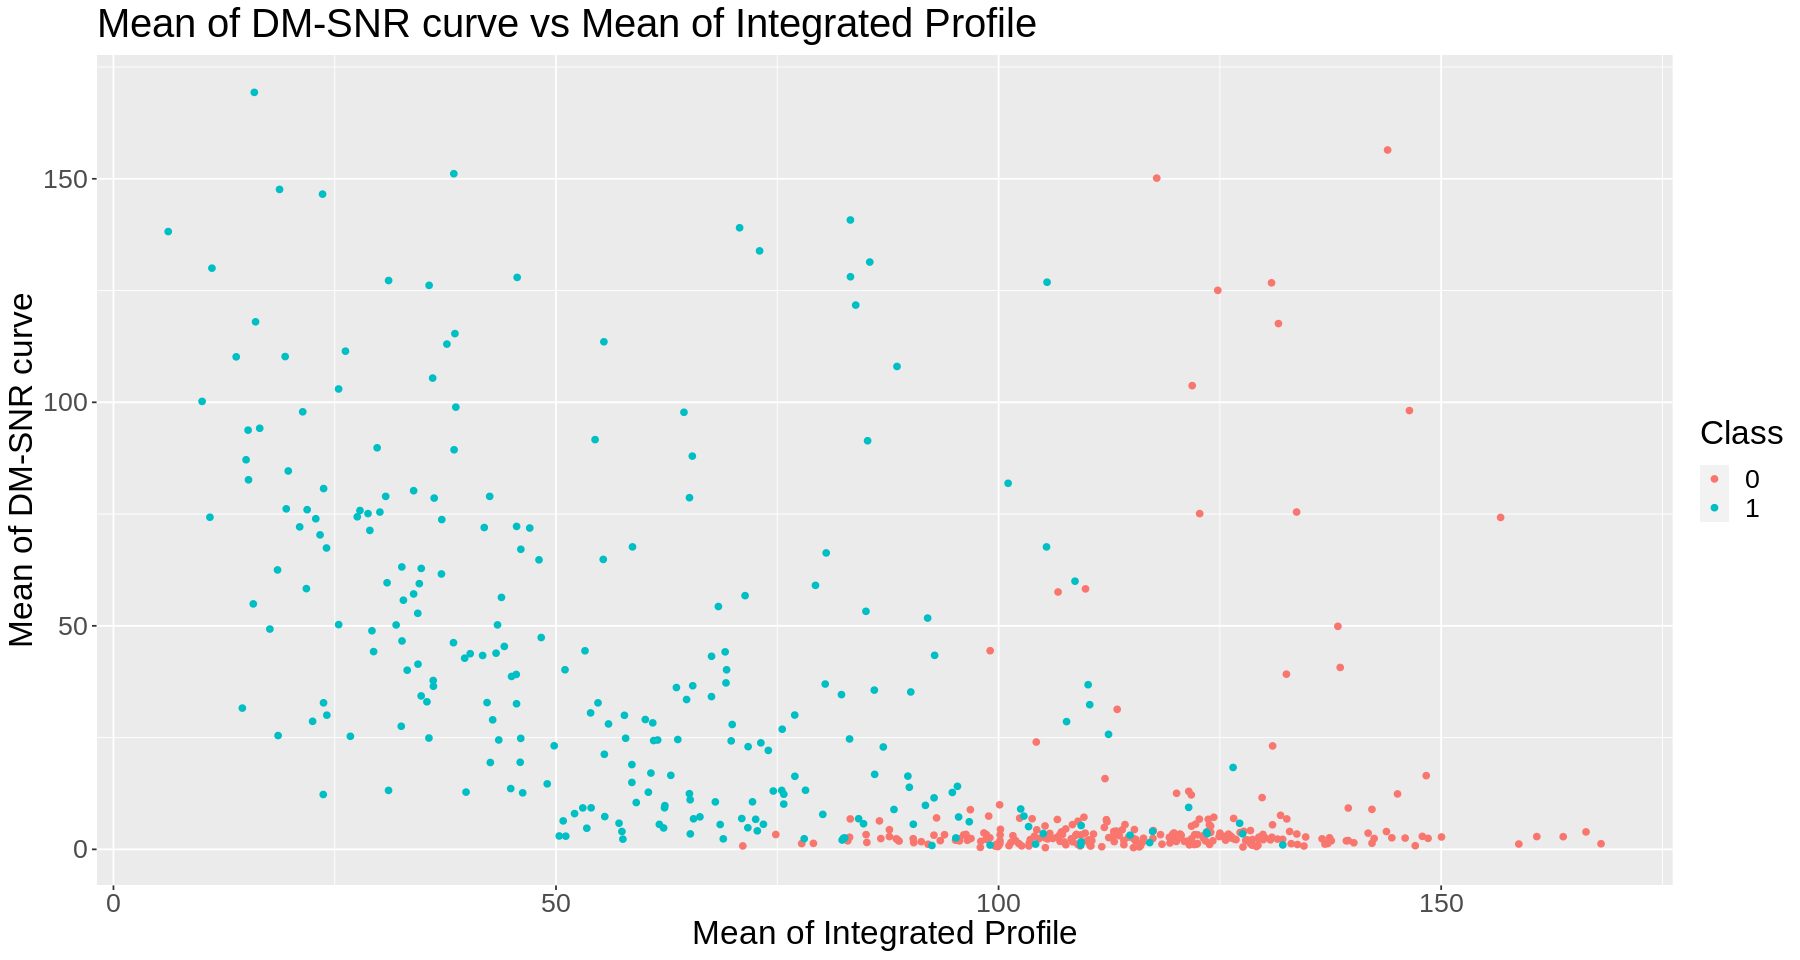

In [4]:
#Plotting scatterplots for Mean Intergrated Profile vs DM-SNR curve

options(repr.plot.width = 15, repr.plot.height = 8)

means_plot <- pulsar_data %>%
                ggplot(aes(x = mean_ip, y = mean_dm, color = class)) +
                geom_point() +
                labs(x = "Mean of Integrated Profile", y = "Mean of DM-SNR curve", color = "Class") +
                ggtitle("Mean of DM-SNR curve vs Mean of Integrated Profile") +
                theme(text = element_text(size = 20))
means_plot

3. Finding the most accurate set of variables

(i) Splitting our data into training and testing sets

(ii) Cross-validation


In [5]:
set.seed(19)

#Splitting our data

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

#Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

#knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

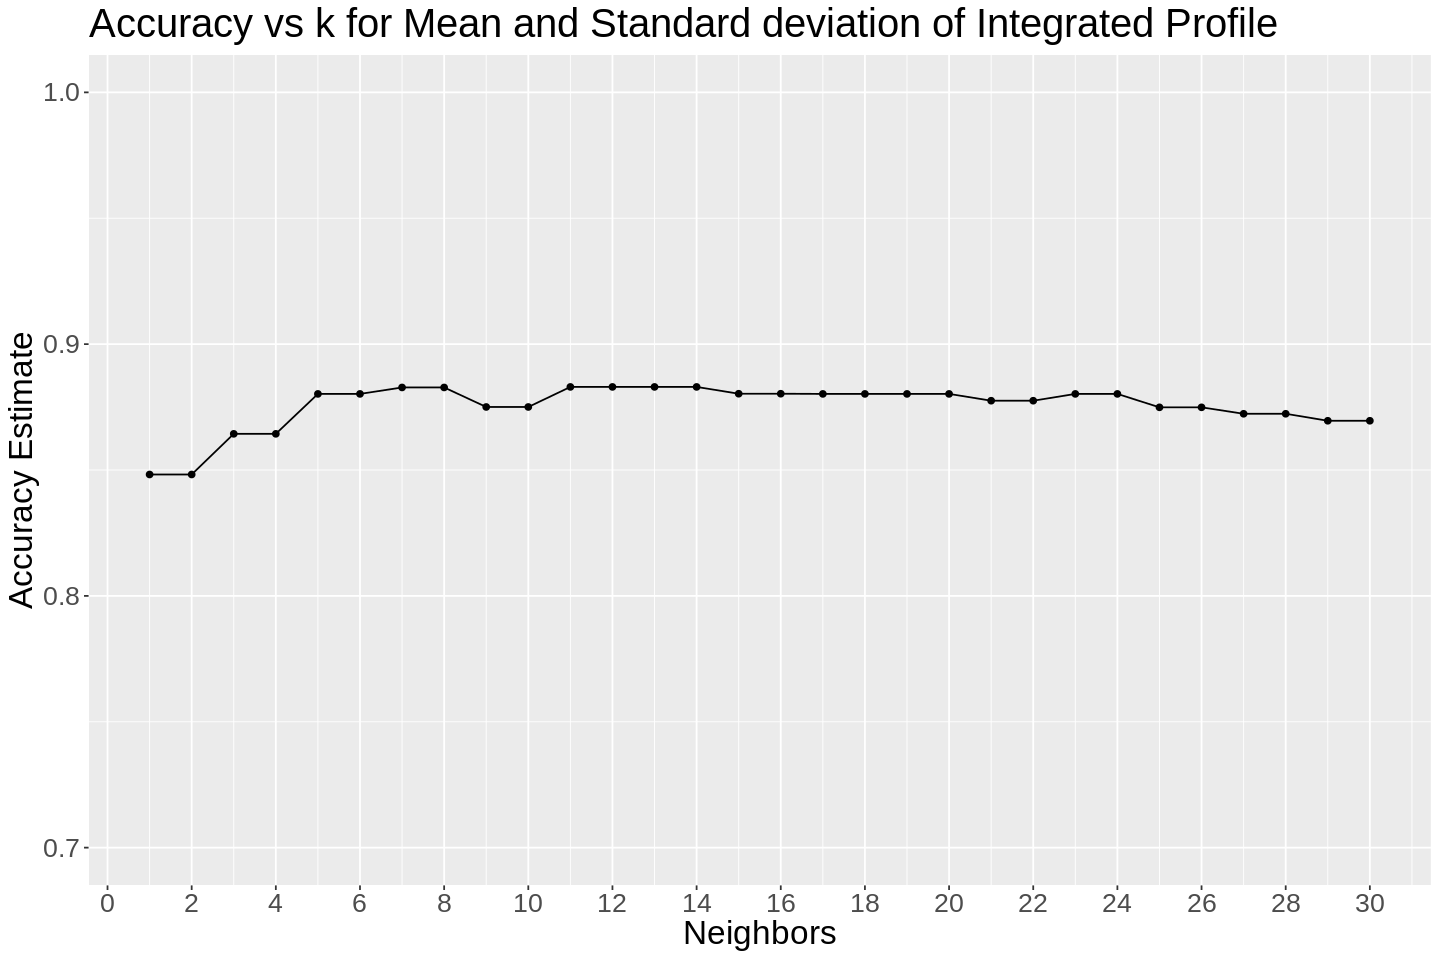

In [6]:
#Accuracy vs k plot for Mean and Standard deviation of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_1 <- recipe(class ~ mean_ip + std_dev_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:30)

knn_ip_results_1 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_1) %>%
       collect_metrics() %>%
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

ip_plot_1 <- ggplot(knn_ip_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Standard deviation of Integrated Profile") +
       theme(text = element_text(size = 20)) 
ip_plot_1

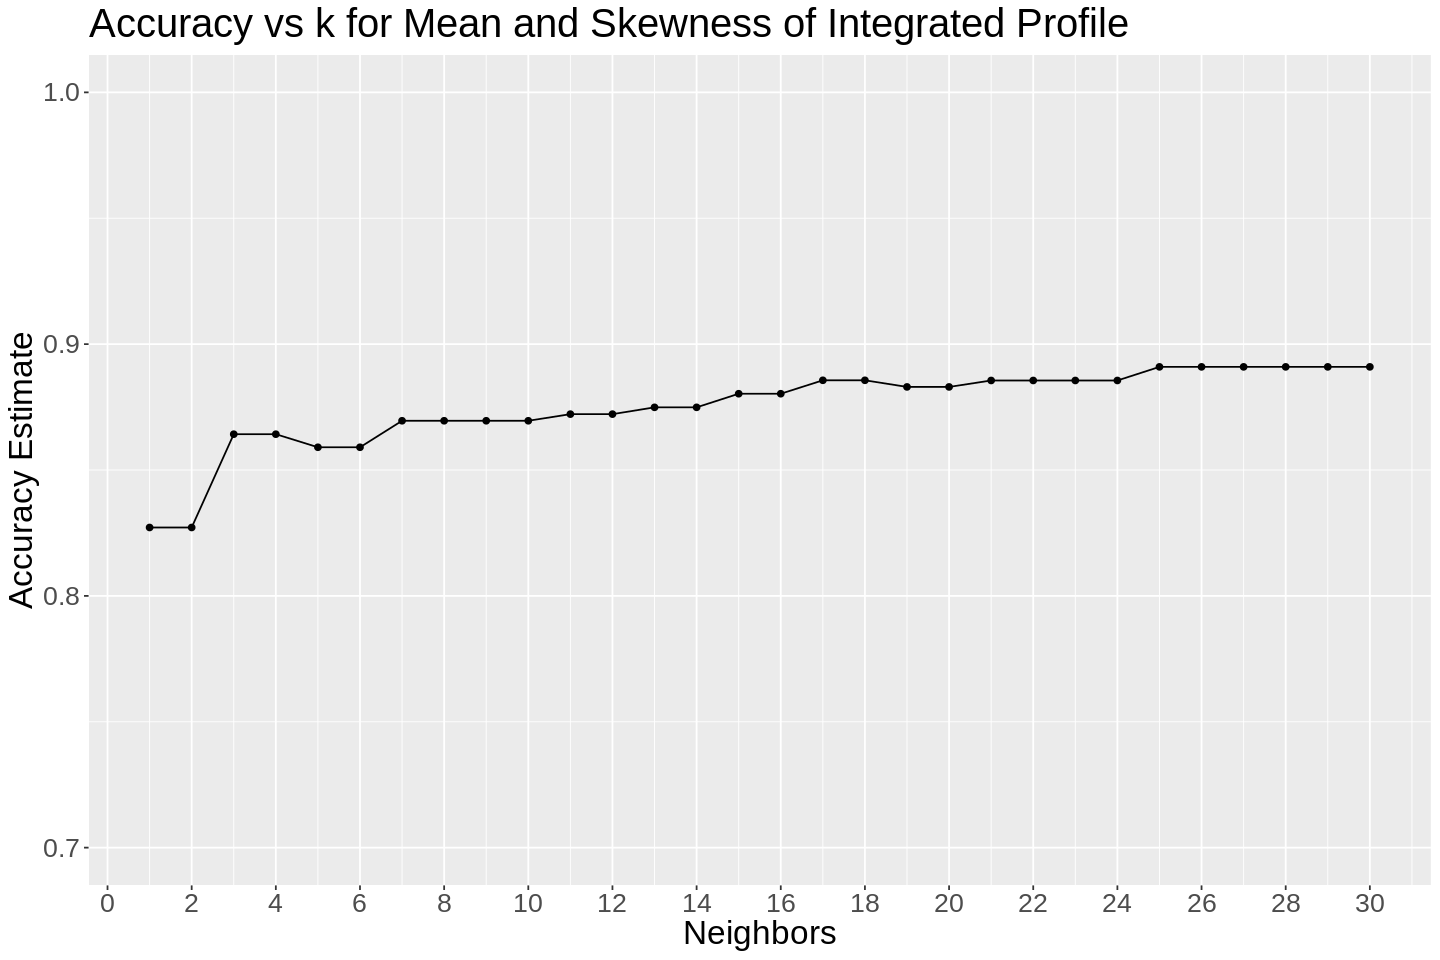

In [7]:
#Accuracy vs k plot for Mean and Skewness of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_2 <- recipe(class ~ mean_ip + skewness_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:30)

knn_ip_results_2 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

ip_plot_2 <- ggplot(knn_ip_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Skewness of Integrated Profile") +
       theme(text = element_text(size = 20)) 
ip_plot_2

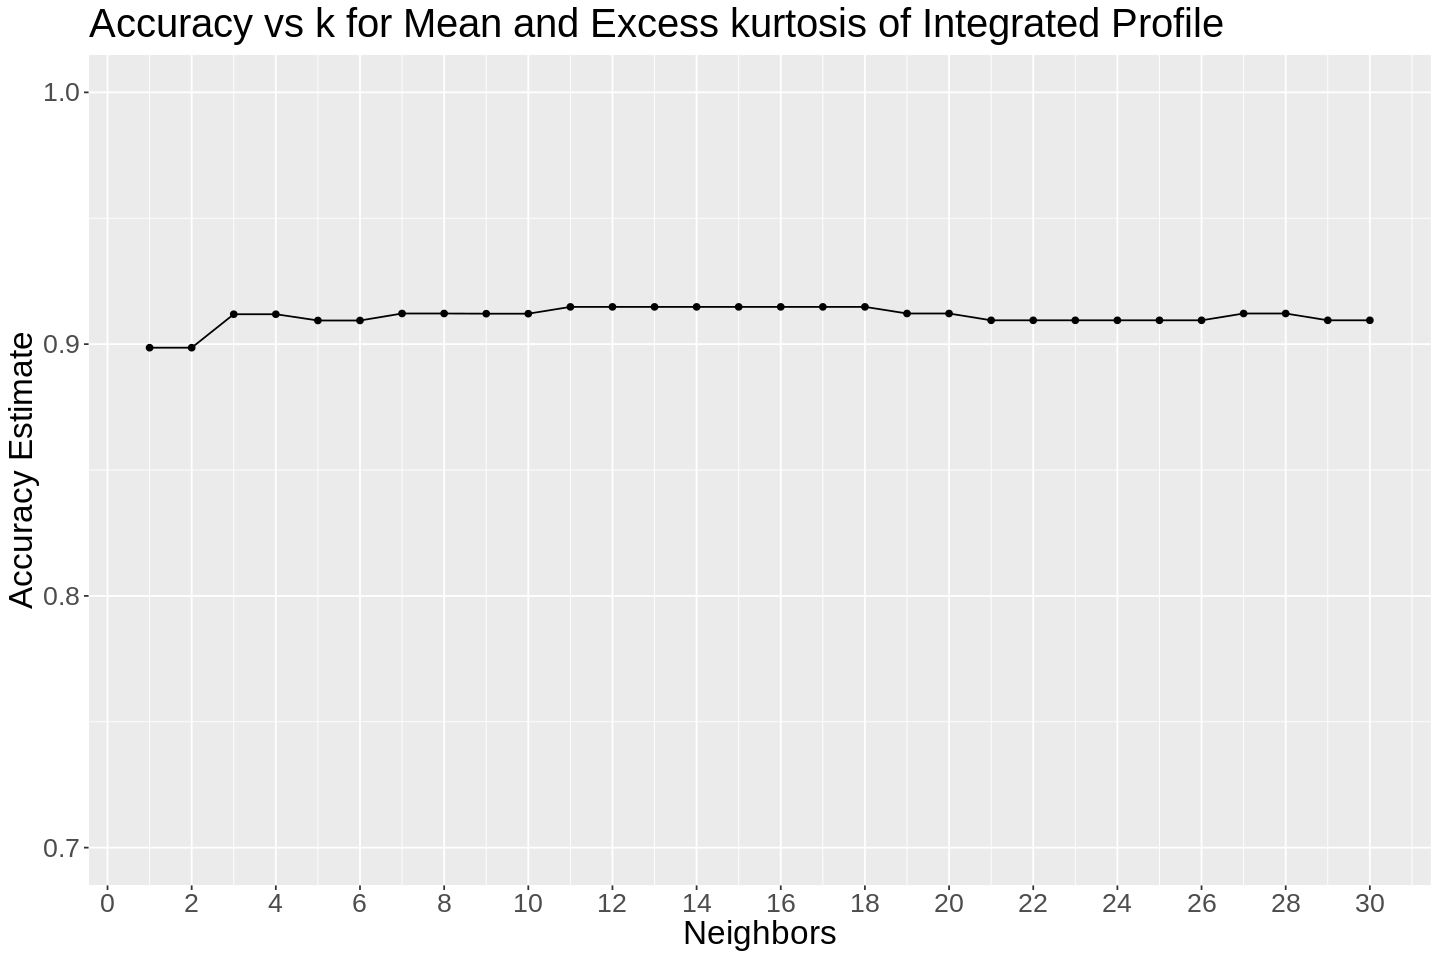

In [8]:
#Accuracy vs k plot for Mean and Excess kurtosis of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_3 <- recipe(class ~ mean_ip + excess_kurtosis_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:30)

knn_ip_results_3 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

ip_plot_3 <- ggplot(knn_ip_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Excess kurtosis of Integrated Profile") +
       theme(text = element_text(size = 20)) 
ip_plot_3

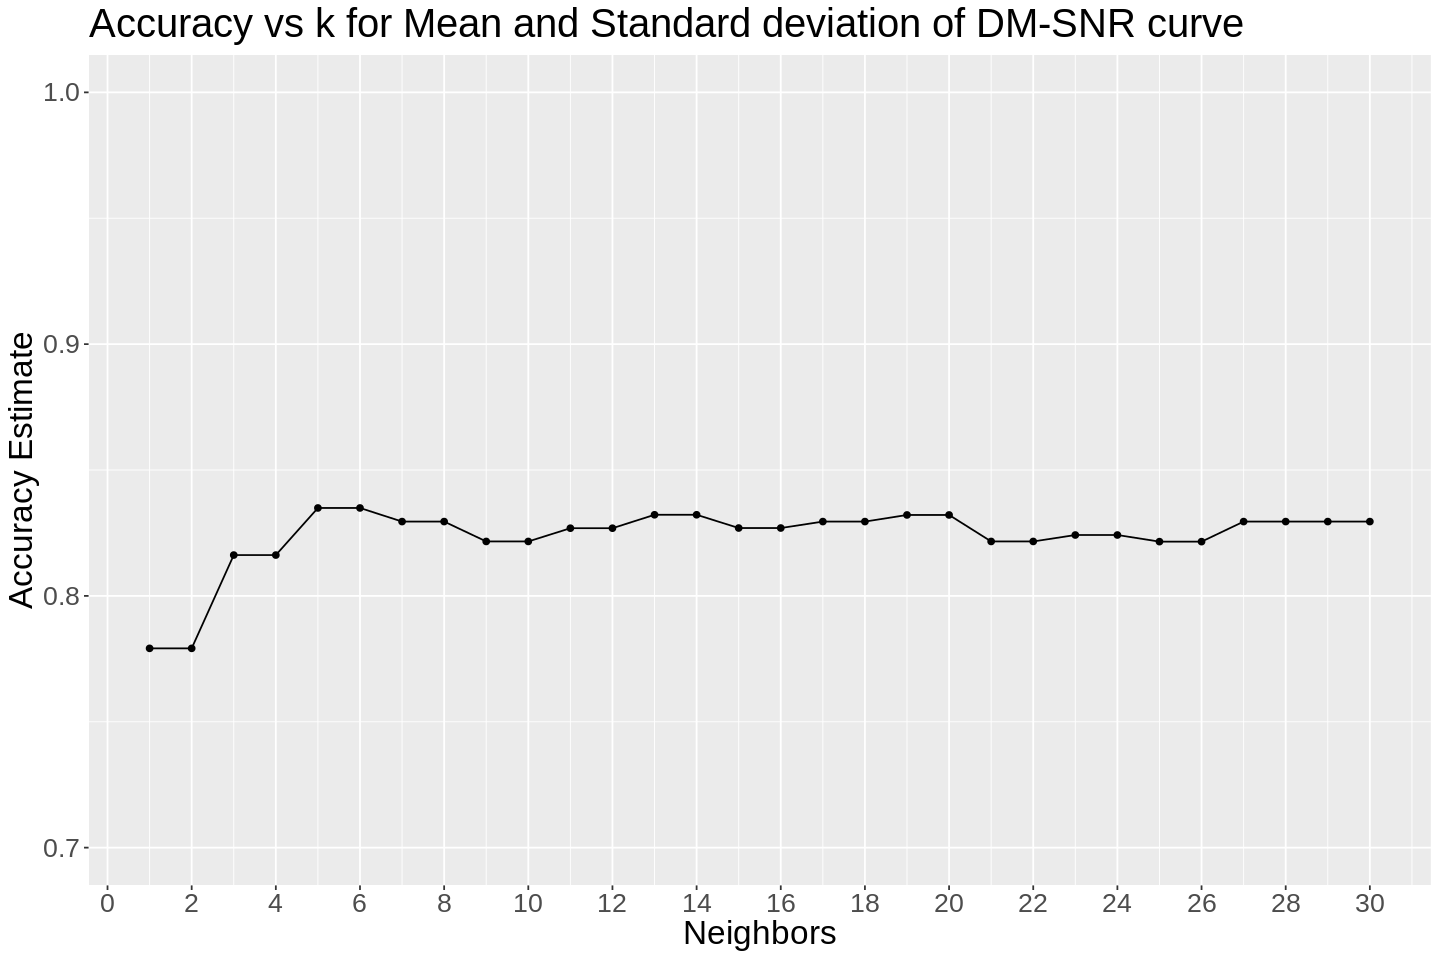

In [9]:
#Accuracy vs k plot for Mean and Standard deviation of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_1 <- recipe(class ~ mean_dm + std_dev_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:30)

knn_dm_results_1 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

dm_plot_1 <- ggplot(knn_dm_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Standard deviation of DM-SNR curve") +
       theme(text = element_text(size = 20)) 
dm_plot_1

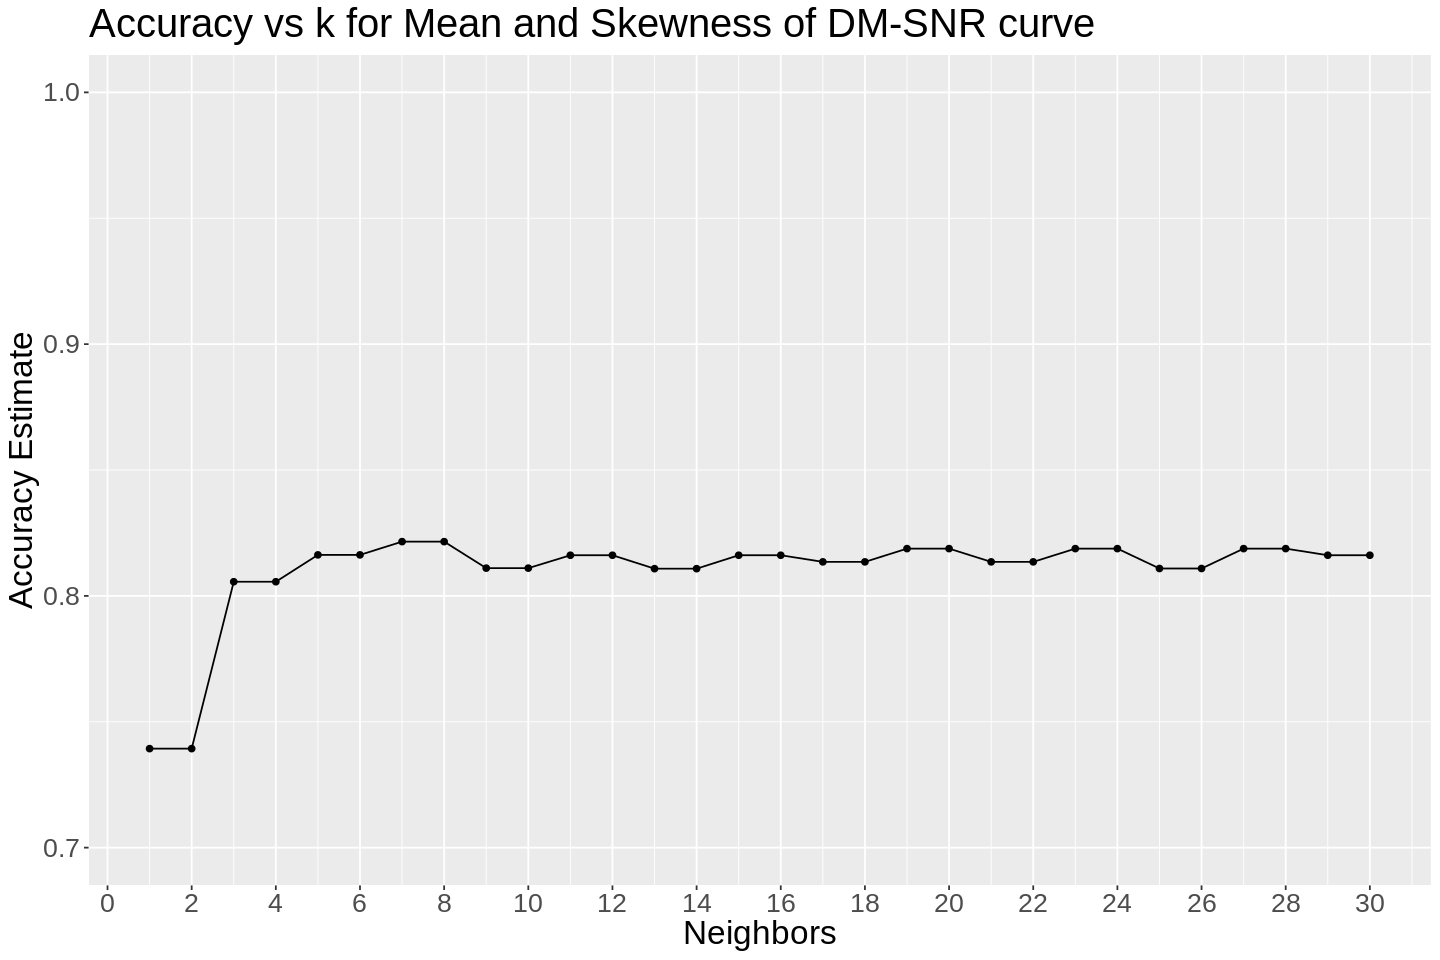

In [10]:
#Accuracy vs k plot for Mean and Skewness of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_2 <- recipe(class ~ mean_dm + skewness_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:30)

knn_dm_results_2 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

dm_plot_2 <- ggplot(knn_dm_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Skewness of DM-SNR curve") +
       theme(text = element_text(size = 20)) 
dm_plot_2

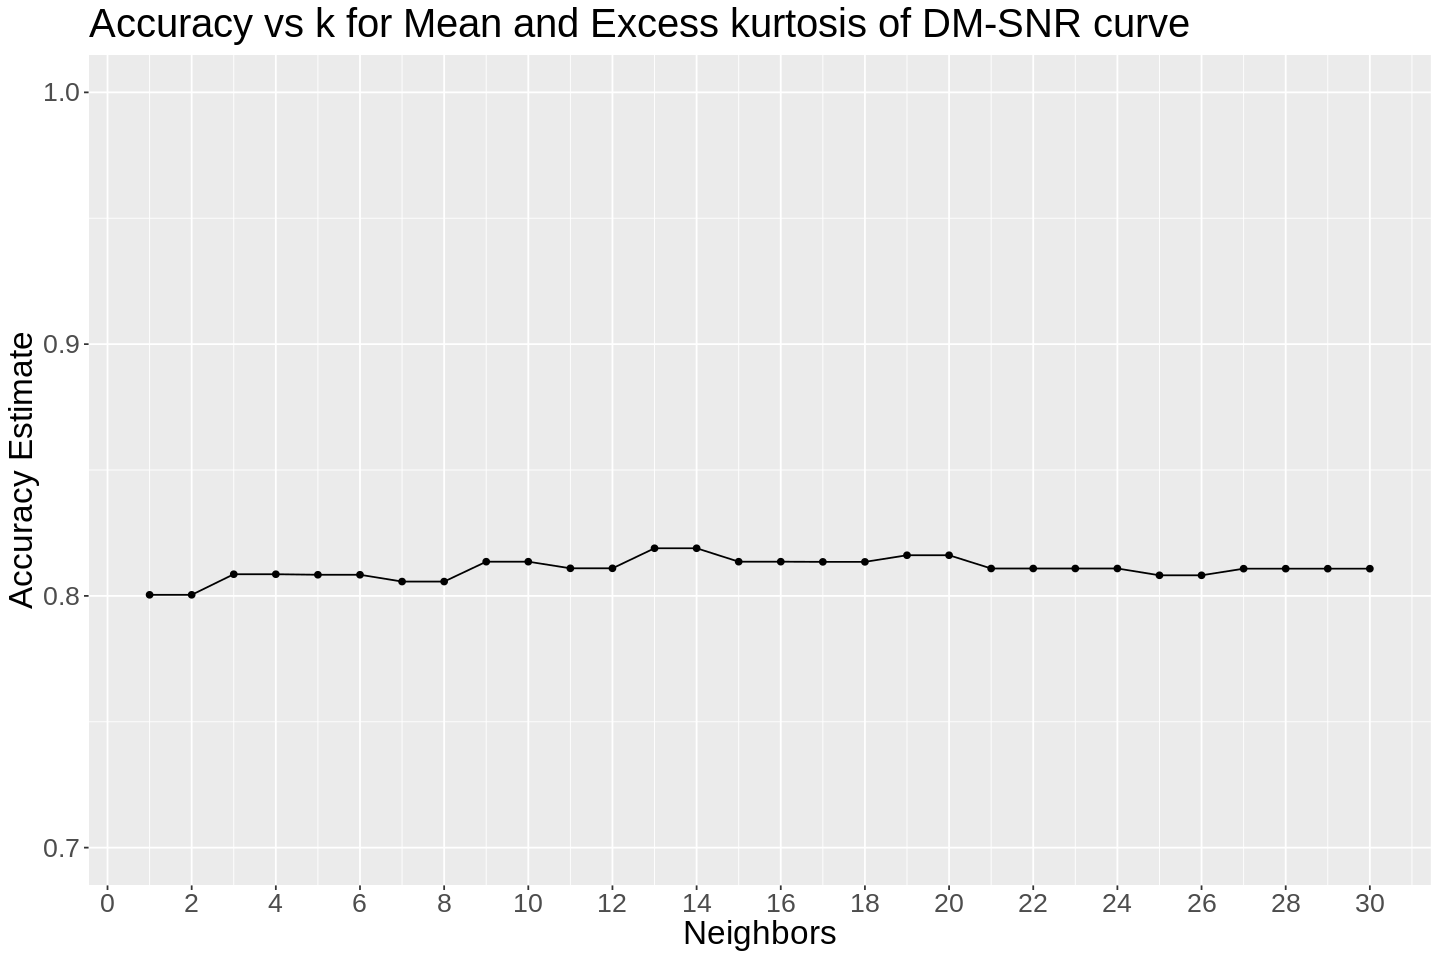

In [11]:
#Accuracy vs k plot for Mean and Excess kurtosis of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_3 <- recipe(class ~ mean_dm + excess_kurtosis_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:30)

knn_dm_results_3 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 8)

dm_plot_3 <- ggplot(knn_dm_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 30, by = 2)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Mean and Excess kurtosis of DM-SNR curve") +
       theme(text = element_text(size = 20)) 
dm_plot_3

In [12]:
max_ip_dev <- knn_ip_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Std dev")

max_ip_skewness <- knn_ip_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Skewness")

max_ip_kurtosis <- knn_ip_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Excess kurtosis")

max_dm_dev <- knn_dm_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Std dev")

max_dm_skewness <- knn_dm_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Skewness")

max_dm_kurtosis <- knn_dm_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables =  "Mean DM-SNR & excess kurtosis")

max_accuracies <- bind_rows(max_ip_dev,max_ip_skewness, max_ip_kurtosis, max_dm_dev, max_dm_skewness, max_dm_kurtosis) %>%
                  arrange(desc(mean))
max_accuracies

neighbors,mean,variables
<int>,<dbl>,<chr>
11,0.9147937,Mean IP & Excess kurtosis
25,0.8909673,Mean IP & Skewness
11,0.8830014,Mean IP & Std dev
5,0.8349218,Mean DM-SNR & Std dev
7,0.8215505,Mean DM-SNR & Skewness
13,0.8189189,Mean DM-SNR & excess kurtosis


In [13]:
#Building our model usings Mean IP and Excess kurtosis predictors

pulsar_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 11) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_model_fit <- workflow() %>%
            add_recipe(pulsar_ip_recipe_3) %>%
            add_model(pulsar_model_spec) %>%
            fit(data = pulsar_training_data)

pulsar_predictions <- predict(pulsar_model_fit, pulsar_testing_data) %>%
                        bind_cols(pulsar_testing_data)

pulsar_metrics <- pulsar_predictions %>%
                    metrics(truth = class, estimate = .pred_class)
pulsar_metrics

pulsar_conf_mat <- pulsar_predictions %>%
                    conf_mat(truth = class, estimate = .pred_class)
pulsar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9596774
kap,binary,0.9193548


          Truth
Prediction  0  1
         0 60  3
         1  2 59

In [14]:
#Predicting the class of a new observation using our model

new_observation <- tibble(mean_ip = 126.583,
                         excess_kurtosis_ip = 0.1754)

class_prediction <- predict(pulsar_model_fit, new_observation)
class_prediction

.pred_class
<fct>
0
